**Importing the required libraries**

In [1]:
#Importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Read the dataset


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
dataset_file = '/content/drive/MyDrive/Colab Notebooks/PG AIML Deep Learning Project/bank.csv'


In [6]:
df = pd.read_csv(dataset_file)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Basic Profiling of dataset**

In [8]:
print ("Shape of Data")
print (df.shape)
print ("")
print ("Columns")
print (df.columns)
print ("")

Shape of Data
(10000, 14)

Columns
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 2. Drop the columns which are unique for all users like IDs


In [12]:
# to check if we have any duplicate records for the same customer
for i,j in enumerate (df.columns):
    print ( 'column Name : %s' %str(j)+     ' -----> Unique : %s' %str(df[j].is_unique))

column Name : RowNumber -----> Unique : True
column Name : CustomerId -----> Unique : True
column Name : Surname -----> Unique : False
column Name : CreditScore -----> Unique : False
column Name : Geography -----> Unique : False
column Name : Gender -----> Unique : False
column Name : Age -----> Unique : False
column Name : Tenure -----> Unique : False
column Name : Balance -----> Unique : False
column Name : NumOfProducts -----> Unique : False
column Name : HasCrCard -----> Unique : False
column Name : IsActiveMember -----> Unique : False
column Name : EstimatedSalary -----> Unique : False
column Name : Exited -----> Unique : False


Insight:
    **RowNumber and CustomerId are unique and they can be dropped**

In [13]:
# Preserving original dataset
df_raw = df

In [14]:
# Dropping RowNumber and CustomerId
df=df.drop(['RowNumber','CustomerId'],axis=1)

In [15]:
df.shape

(10000, 12)

In [16]:
# Surname may not add any value and so dropping that column as well

# Dropping Surname
df=df.drop(['Surname'],axis=1)

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Object columns:
     [Geography,     Gender]

In [18]:
df['Geography'].unique().shape

(3,)

In [19]:
df['Gender'].unique().shape

(2,)

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# 3. Perform bivariate analysis and give your insights from the same (5 points) 


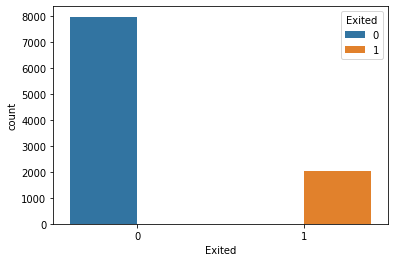

In [21]:
sns.countplot(x='Exited', hue = 'Exited',data = df)

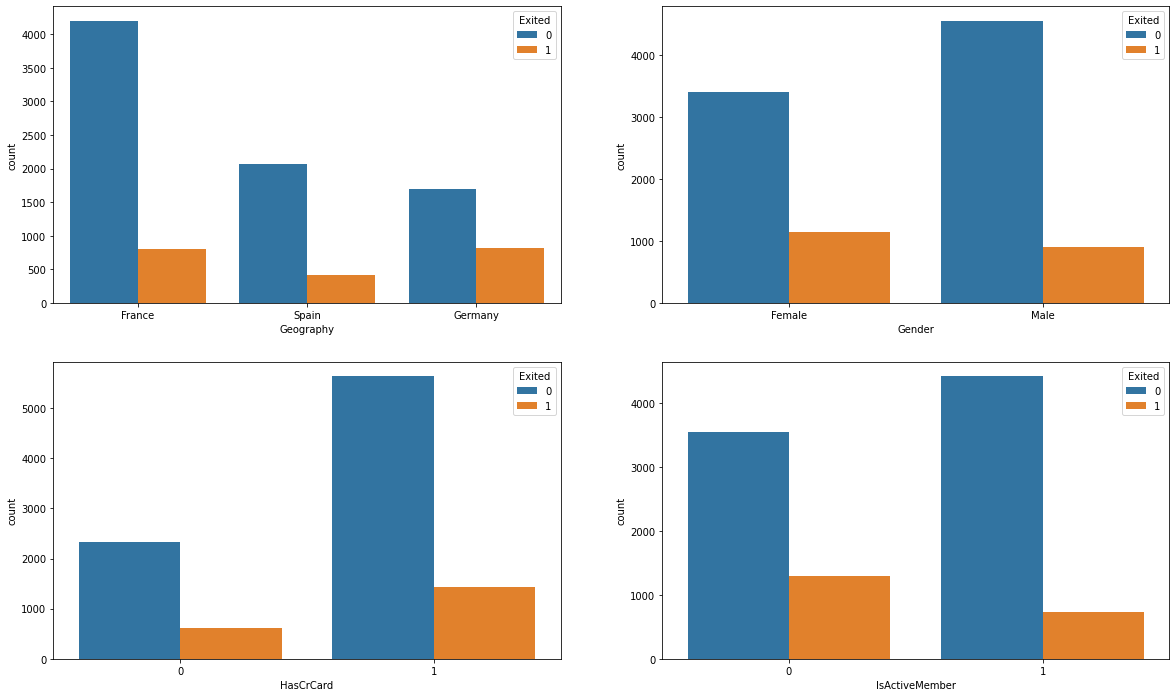

In [22]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

**Insights**


*   (2000 out of 10000) 20% of total customers have exited status
*   France has more customers than other two countries (Spain & Germamny)
*   Looking at the bar graph, % of exited status is more in Female than that of male
*   It looks like, customers with credit card churning out more than that of customers with no credit card
*.  As expected, Non-Active member churning out more than that of Active members






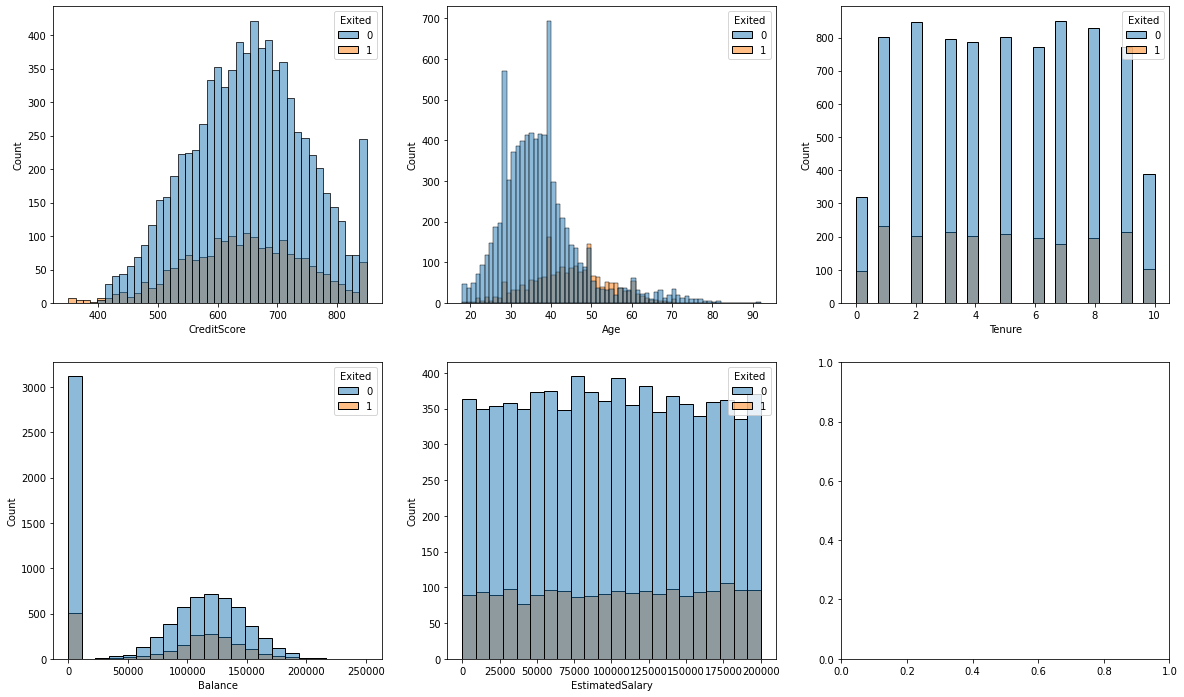

In [23]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(data=df, x="CreditScore", hue="Exited",ax=axarr[0][0])
sns.histplot(data=df, x="Age", hue="Exited",ax=axarr[0][1])
sns.histplot(data=df, x="Tenure", hue="Exited",ax=axarr[0][2])
sns.histplot(data=df, x="Balance", hue="Exited",ax=axarr[1][0])
sns.histplot(data=df, x="EstimatedSalary", hue="Exited",ax=axarr[1][1])



Insights


*   Credit Score is uniformly distributed for both retained and churned customers
*   Per Age distribution chart, younger customers looks to be more retained than that of old customers
*    Balance also looks to be uniformly distributed for othe retained and churned customers



# 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [26]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [27]:
df.shape 

(10000, 11)

In [28]:
#one hot encoding for categorical columns:

df = pd.get_dummies(df, columns=['Geography', 'Gender'])


In [29]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [30]:
df.shape

(10000, 14)

In [31]:
X_data=df[['CreditScore', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

y_data=df[['Exited']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000, 1)
(3000, 1)


# 5. Normalize the train and test data (10points)


In [34]:

from sklearn.preprocessing import StandardScaler


# create scaler
scaler = StandardScaler()
# fit and transform in one step
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# inverse transform
#inverse = scaler.inverse_transform(standardized)


In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000, 1)
(3000, 1)


# 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)


In [36]:
#creating an empty model
model = Sequential()

#Adding layers:
#Output layer with sigmoid for binary classification
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [37]:
sgd = optimizers.Adam(lr = 0.01)
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [38]:
# After many iterations on batch_size, epoch, settled on batch_size = 10 and epochs = 50 for better accuracy & loss on limited iteration

history = model.fit(X_train, y_train ,validation_split=0.10, batch_size = 10, epochs = 50,shuffle=True, verbose=0 )

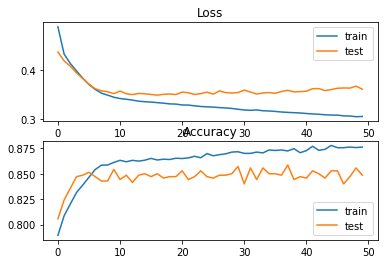

In [39]:

# plot loss during training
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
results = model.evaluate(X_test, y_test.values)


94/94 [==============================] - 0s 2ms/step - loss: 0.3526 - accuracy: 0.8540


# 7. Predict the results using 0.5 as a threshold 

In [41]:
#prediction variable
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


# *8*. Print the Accuracy score and confusion matrix

In [50]:
#Model score calculation
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print ("Accuracy :" +str(score))


Accuracy :0.854


In [43]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2395
           1       0.68      0.52      0.59       605

    accuracy                           0.85      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



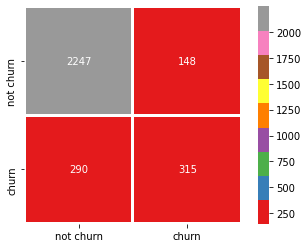

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
 xticklabels=["not churn","churn"],
 yticklabels=["not churn","churn"],
 linewidths = 2,linecolor = "w",cmap = "Set1")
plt.subplots_adjust(wspace = .3,hspace = .3)